##### torch-meta에 있는 omniglot 설치

In [1]:
import warnings
from typing import Any, Dict, Tuple

import matplotlib.pyplot as plt
from torchmeta.datasets.helpers import omniglot
from torchmeta.utils.data import BatchMetaDataLoader

warnings.filterwarnings(action="ignore")

#### BatchMetaDataLoader란?
메타 학습을 위해 특별히 설계된 데이터로더.
1. 에피소드 생성
 - 메타학습은 에피소드 단위로 처리. 여러 에피소드들을 배치단위로 로드.
2. 샘플링 전략
 - 다양한 샘플링 전략가능 -> N-way, K-shot 등의 설정이 가능.

In [2]:
def get_dataloader(
    # cinfig를 딕셔너리 형태로 받아오고,
    # 반환값은 BatchMetaDataLoader, BatchMetaDataLoader, BatchMetaDataLoader
    # 3개의 데이터 로더를 튜플형태로 반환한다.
    config: Dict[str, Any]
) -> Tuple[BatchMetaDataLoader, BatchMetaDataLoader, BatchMetaDataLoader]:
    ###########################################
    train_dataset = omniglot(
        folder=config["folder_name"],
        shots=config["num_shots"],
        # test_shots=1, # default = shots
        ways=config["num_ways"],
        shuffle=True,
        meta_train=True,
        download=config["download"],
    )
    
    train_dataloader = BatchMetaDataLoader(
        train_dataset, batch_size=config["batch_size"], shuffle=True, num_workers=1
    )
    ###########################################

    ###########################################
    val_dataset = omniglot(
        folder=config["folder_name"],
        shots=config["num_shots"],
        # test_shots=1, # default = shots
        ways=config["num_ways"],
        shuffle=True,
        meta_val=True,
        download=config["download"],
    )
    val_dataloader = BatchMetaDataLoader(
        val_dataset, batch_size=config["batch_size"], shuffle=True, num_workers=1
    )
    ###########################################
    
    ###########################################
    test_dataset = omniglot(
        folder=config["folder_name"],
        shots=config["num_shots"],
        # test_shots=1, # default = shots
        ways=config["num_ways"],
        shuffle=True,
        meta_test=True,
        download=config["download"],
    )
    test_dataloader = BatchMetaDataLoader(
        test_dataset, batch_size=config["batch_size"], shuffle=True, num_workers=1
    )
    ###########################################

    return train_dataloader, val_dataloader, test_dataloader

In [3]:
config = {
    "folder_name": "dataset", # 저장 폴더
    "download": True, 
    "num_shots": 2, # 클래스당 샷(예제) 수
    "num_ways": 5, # 클래스 수
    "batch_size": 3, 
    "num_batches_train": 6000,
    "num_batches_test": 2000,
    "num_batches_val": 100,
    "device": "cpu",  # "cuda" or "cpu"
}

train_dataloader, val_dataloader, test_dataloader = get_dataloader(config)

  0%|          | 0/9464212 [00:00<?, ?it/s]

  0%|          | 0/6462886 [00:00<?, ?it/s]

#### 데이터로더의 데이터 반환화인.

In [4]:
for batch_idx, batch in enumerate(train_dataloader):
    if batch_idx >= config["num_batches_train"]:
        break

    support_xs = batch["train"][0].to(device=config["device"])
    support_ys = batch["train"][1].to(device=config["device"])
    query_xs = batch["test"][0].to(device=config["device"])
    query_ys = batch["test"][1].to(device=config["device"])

    print(
        f"support_x shape : {support_xs.shape}\n",
        f"support_y shape : {support_ys.shape}\n",
        f"query_x shape   : {query_xs.shape}\n",
        f"query_y shape   : {query_ys.shape}",
    )

    break

support_x shape : torch.Size([3, 10, 1, 28, 28])
 support_y shape : torch.Size([3, 10])
 query_x shape   : torch.Size([3, 10, 1, 28, 28])
 query_y shape   : torch.Size([3, 10])


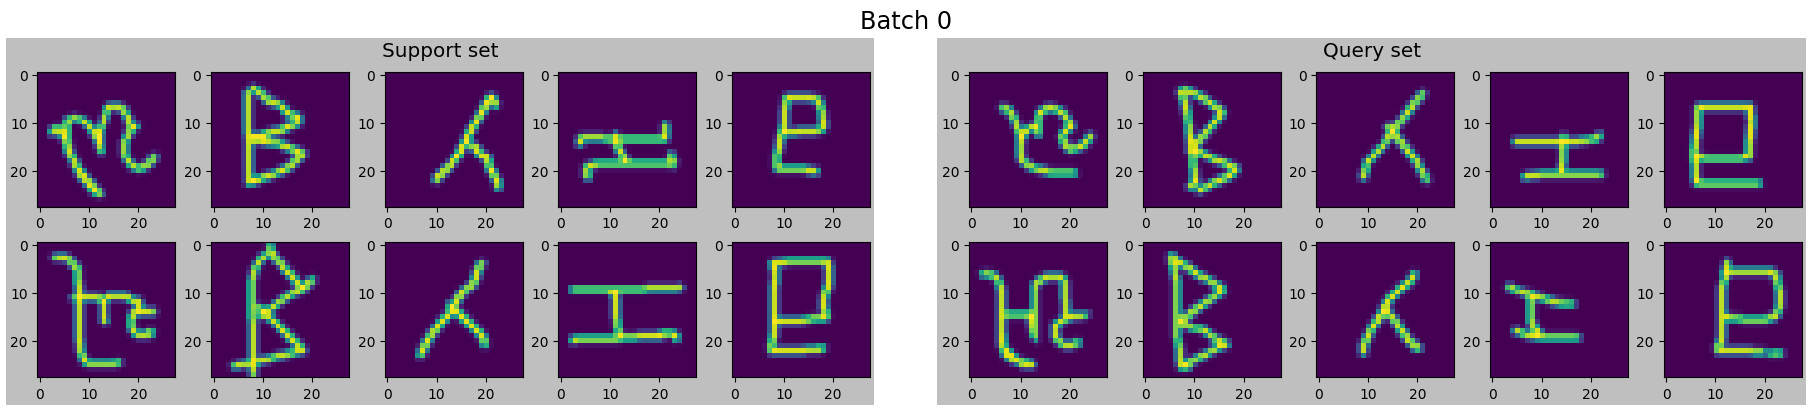

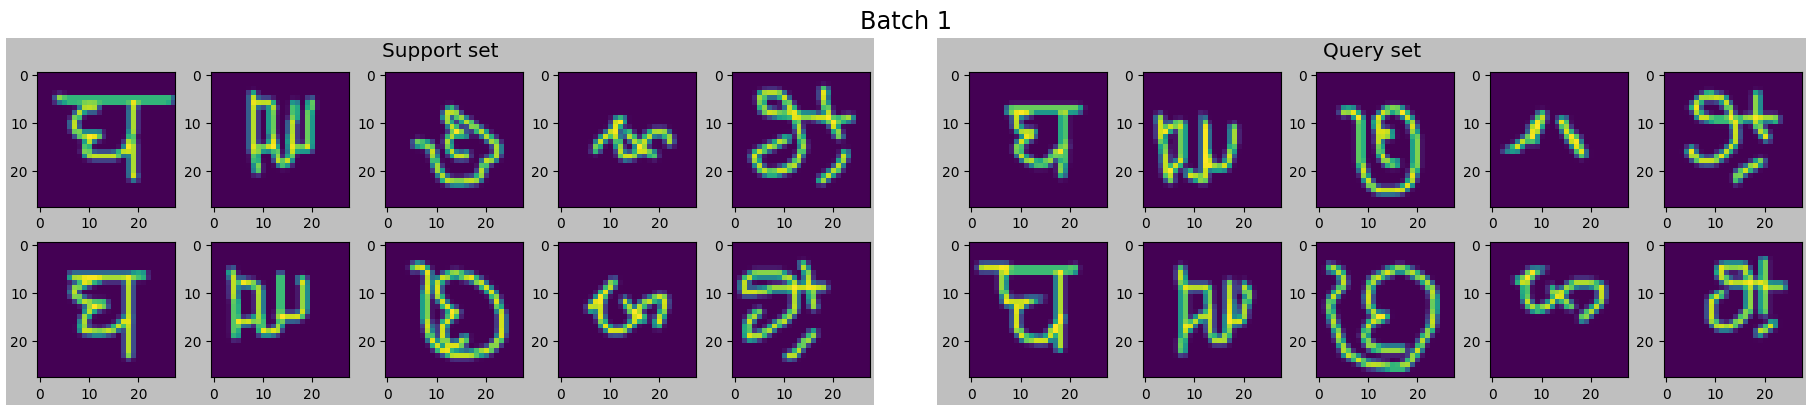

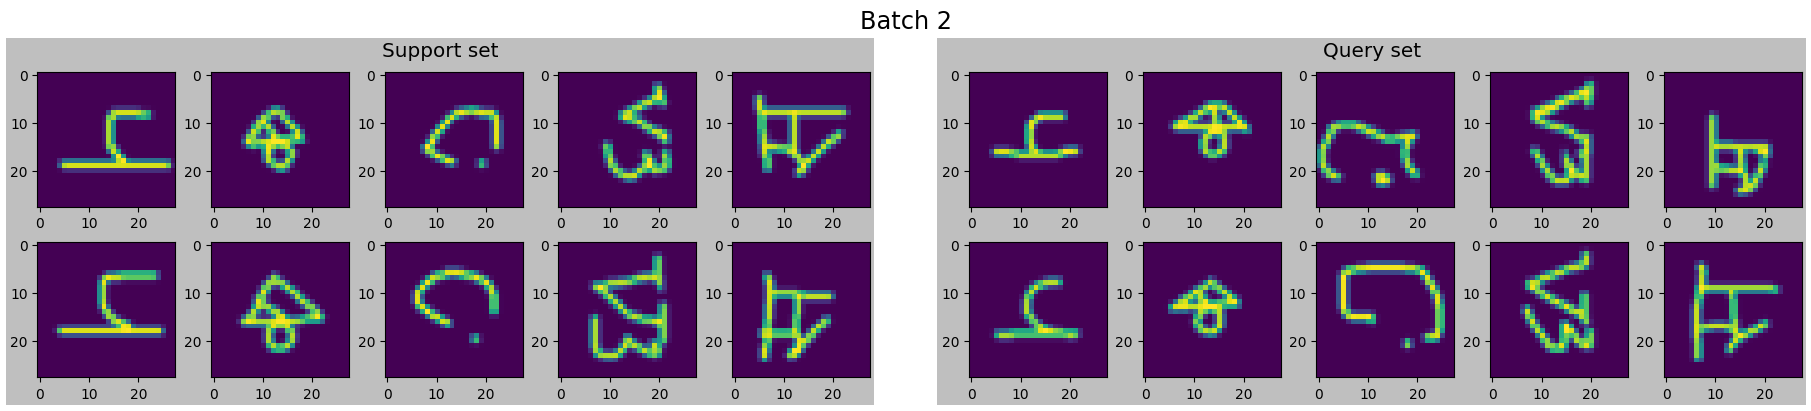

In [5]:
for b in range(config["batch_size"]):
    fig = plt.figure(constrained_layout=True, figsize=(18, 4))
    subfigs = fig.subfigures(1, 2, wspace=0.07)

    subfigs[0].set_facecolor("0.75")
    subfigs[0].suptitle("Support set", fontsize="x-large")
    support_axs = subfigs.flat[0].subplots(nrows=2, ncols=5)
    for i, ax in enumerate(support_axs.T.flatten()):
        ax.imshow(support_xs[b][i].permute(1, 2, 0).squeeze(), aspect="auto")

    subfigs[1].set_facecolor("0.75")
    subfigs[1].suptitle("Query set", fontsize="x-large")
    query_axes = subfigs.flat[1].subplots(nrows=2, ncols=5)
    for i, ax in enumerate(query_axes.T.flatten()):
        ax.imshow(query_xs[b][i].permute(1, 2, 0).squeeze(), aspect="auto")

    fig.suptitle("Batch " + str(b), fontsize="xx-large")

    plt.show()